In [44]:
import numpy as np


maze = np.random.randint(0, 2, (6,6))
maze[0,0] = 2
maze[5,5] = 3

maze

array([[2, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 3]])

In [83]:
def direction2action(delta_x, delta_y):
    if (delta_x == 0):
        if (delta_y == 1):
            return 2
        elif (delta_y == 0):
            return 0
        elif (delta_y == -1):
            return 1
    elif (delta_x == 1 and delta_y == 0):
        return 4
    elif (delta_x == -1 and delta_y == 0):
        return 3
    raise Exception("Unknown direction")

def action2direction(action):
    a2d = [(0,0), (0, -1), (0, 1), (-1, 0), (1, 0)]
    return a2d[action]

maze[2,3] = 0
maze

array([[2, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 3]])

In [88]:
class BFS():
    def solve(self, maze):
        """
        param: maze: numpy.matrix
        return: history: [numpy.matrix, action]
        return: solvable: boolean
        """
        
        # reset param
        self._reset(maze)
        
        self.search_maze = maze.copy()
        self.visited = maze.copy()
        self.visited[np.where(self.visited==3)] = 0
        self.visited[np.where(self.visited==2)] = 0
        
        search = []
        history = []
        
        # start BFS
        search.append((0,0))
        self.visited[0,0] = 1
        
        while(len(search) > 0):
            x,y = search[0]
            search = search[1:]
            
            if (self.search_maze[y,x] == 3):
                self.search_maze[np.where(self.search_maze==2)] = 0
                hx, hy = x, y
                while True:
                    if (hx == 0 and hy == 0):
                        break
                    thisx, thisy = self.parent[hy, hx]
                    action = direction2action(hx-thisx, hy-thisy)
                    if (self.search_maze[hy, hx] == 2):
                        self.search_maze[hy, hx] = 0
                    self.search_maze[thisy, thisx] = 2
                    hx, hy = thisx, thisy
                    history.append((self.search_maze.copy(), action))
                break
            neibs = self._get_neighbour((x,y))
            for n in neibs:
                nx, ny = n
                self.visited[ny, nx] = 1
                self.parent[ny, nx] = (x,y)
                search.append(n)
        
        history.reverse()
        solvable = True
        if len(history) == 0:
            solvable = False
        return history, solvable    
            
        
    def _get_neighbour(self, pos):
        h, w = self.search_maze.shape
        x,y = pos
        delta_x = [0, 0, -1, 1]
        delta_y = [-1, 1, 0, 0]
        neibs = []
        
        for i in range(4):
            new_x = x + delta_x[i]
            new_y = y + delta_y[i]
            if (0<= new_x < w and 0 <= new_y < h and self.visited[new_y][new_x] == 0):
                neibs.append((new_x, new_y))
        return neibs
        
        
    def _reset(self, maze):
        self.parent = np.array([[(-1,-1) for i in range(6)] for i in range(6)])
        self.pos = (0,0)
        self.h, self.w = maze.shape

bfs = BFS()
bfs.solve(maze)

[[2 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 2 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 2 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 2 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 2 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 2 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 2 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 2 0 1]
 [0 1 0 0 0 3]] 2
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 2 0 3]] 4
[[0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 2 3]] 4


In [55]:
def BasicMiniGridEnv():
    def __init__(self, maze=None):
        """
        param: maze: numpy.matrix
        """
        self.maze = maze
        self.h, self.w = maze.shape

(1, 2)

In [4]:
import torch
import numpy as np

a = torch.tensor([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]], dtype=torch.float32)
dl = torch.utils.data.DataLoader(dataset=a, batch_size=1, shuffle=True)
for i, d in enumerate(dl):
    print(i, ":", d.view(-1, 6))

print("End")
# print(torch.randn_like(a))

0 : tensor([[ 7.,  8.,  9., 10., 11., 12.]])
1 : tensor([[1., 2., 3., 4., 5., 6.]])
End


In [23]:
import numpy as np
a = np.matrix([[1,2],[3,4]])
list(np.where(a==3)) == (1,0)
print(np.random.rand

[ 0.00600482  0.77428366 -0.59321804  1.3945151 ]


In [28]:
a = np.array([1, 2, 3, 4]).reshape(-1,2)
print(a)
print(np.average(a, axis=1))

[[1 2]
 [3 4]]
[1.5 3.5]


In [39]:
import random
from collections import namedtuple
Transition = namedtuple("Transition", ("name", "value"))
a = [('a', 1), ('b', 2), ('c', 3), ('a', 4)]
a = [Transition(*i) for i in a]
print(*a)
a = zip(*a)
print(Transition(*a))

Transition(name='a', value=1) Transition(name='b', value=2) Transition(name='c', value=3) Transition(name='a', value=4)
Transition(name=('a', 'b', 'c', 'a'), value=(1, 2, 3, 4))


In [7]:
path = "/home/lemon/Workspace/2020Semester/UGVR/Bayesian_Grid/scripts/model/IL/Basic/BayesGridEnv"

import torch

checkpoint = torch.load(path)
print(checkpoint)

{'50': OrderedDict([('layer1.0.weight', tensor([[[[ 0.1961,  0.1484],
          [-0.3210,  0.3101]]],


        [[[-0.4234, -0.4564],
          [-0.3664, -0.1178]]],


        [[[ 0.1565, -0.2203],
          [-0.2472,  0.3369]]],


        [[[ 0.0905,  0.3925],
          [-0.2911, -0.0742]]],


        [[[-0.1526,  0.2178],
          [ 0.1267, -0.2874]]],


        [[[ 0.4791,  0.4099],
          [ 0.0011, -0.1105]]],


        [[[ 0.3024, -0.1040],
          [-0.0437,  0.0082]]],


        [[[-0.3899,  0.1163],
          [ 0.5096, -0.0938]]]], device='cuda:0')), ('layer1.0.bias', tensor([-0.4646,  0.1199,  0.4408,  0.2311, -0.0521,  0.1181, -0.4170,  0.0658],
       device='cuda:0')), ('layer1.1.weight', tensor([0.9669, 0.9623, 1.0546, 0.9974, 1.0103, 0.9813, 1.0190, 0.9882],
       device='cuda:0')), ('layer1.1.bias', tensor([-0.0230, -0.0372,  0.0162, -0.0318, -0.0123, -0.0436, -0.0463, -0.0323],
       device='cuda:0')), ('layer1.1.running_mean', tensor([-0.3769, -0.2391,  0.4476, 

In [30]:
import numpy as np
a = np.array([[1,2], [2,3], [3,4]]).T
print(a)

[[1 2 3]
 [2 3 4]]


In [31]:
class Parent(object):
    def __init__(self):
        self.me()
    def me(self):
        print("Parent")

class Child(Parent):
    def __init__(self):
        super(Child, self).__init__()
    def me(self):
        print("Child")
c = Child()

Child


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class HardMazeDiscriminator(object):
    def __init__(self):
        super(HardMazeDiscriminator, self).__init__()
        

class AgentPerformanceDiscrininator(object):
    


[True, True]

In [30]:
a = torch.tensor(10*np.ones(10)).float()
a = F.softmax(a, dim=0)
a = F.kl_div(a,a,reduction="batchmean")
a

tensor(-0.2403)

In [36]:
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
ind = np.argpartition(a, 4)[-4:]
a[ind]
print(a[0])

np.mean(a)

9


4.2

In [54]:
import pandas as pd

data = [["a", 1], ["b", 2], ["c", 3]]
data =pd.DataFrame(data, columns=["name", "value"])
value = list(data.loc[data["name"]=="a", "value"])
value = [0]
data.loc[data["name"]=="a", "value"] = value
data

,name,value
0,a,0
1,b,2
2,c,3


[0.34809528 0.46119352 0.56537426 0.62673996 0.68288112 0.65124652
 0.72368556 0.61950482 0.4124086  0.        ]
[0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0. ]


Text(0,0.5,'Distance to goal')

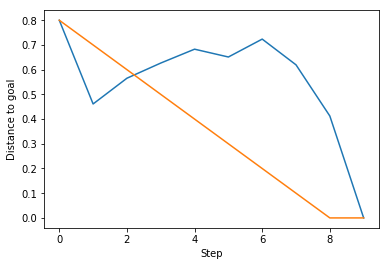

In [105]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

def smooth(data, sm=1):
    if sm > 1:
        y = np.ones(sm)*1.0/sm
        data = np.convolve(y, data, "same")
    return data

y1 = np.random.rand(9)
y1 += abs(min(y1))
y1 = smooth(y1, sm=5)
y1 = np.append(y1, 0)
print(y1)
y2 = sorted(np.arange(9), reverse=True)
# y2 = smooth(y2, sm=2)
y2 = np.append(y2, 0)
y2 = np.array(y2) / 10
y3 = np.random.rand(10)
print(y2)
y1[0] = 0.8
plt.plot(np.arange(len(y1)), y1)
plt.plot(np.arange(len(y1)), y2)
plt.xlabel("Step")
plt.ylabel("Distance to goal")


In [11]:
from mygrid.MiniGrid.Generator.MazeGene import MazeGene
import numpy as np
import bisect
import random
gene = MazeGene()
x = []
for i in range(10):
    m, _, _ = gene.gene()
    score = random.randint(0,10)
    pos = bisect.bisect_right([_x[1] for _x in x], score)
    x.insert(pos, (m, score))

print(x)

ModuleNotFoundError: No module named 'mygrid.MiniGrid'

In [7]:
import numpy as np
a = np.array([1,2,3])
print(np.var(a))

0.6666666666666666


In [3]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X, y)
gpr.score(X, y

# gpr.predict(X[:2,:], return_std=True)
print(gpr.optimizer.max_iter)

AttributeError: 'str' object has no attribute 'max_iter'

In [20]:
import pickle
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
print(X)
X = np.array([[1,1,1], [1,1,1]])
tree = KDTree(X, leaf_size=2)        # doctest: +SKIP
s = pickle.dumps(tree)                     # doctest: +SKIP
tree_copy = pickle.loads(s)                # doctest: +SKIP
dist, ind = tree_copy.query(X[0], k=1)     # doctest: +SKIP
print(ind)  # indices of 3 closest neighbors

print(dist)  # distances to 3 closest neighbors

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]]


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
a = np.array([1,1,1])
a = a.reshape(1,-1)
a = [1,1,1]
a.extend([1,1])
a

[1, 1, 1, 1, 1]

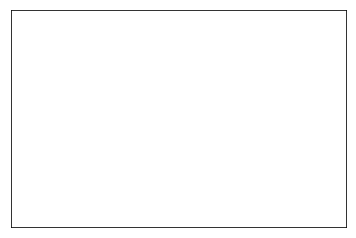

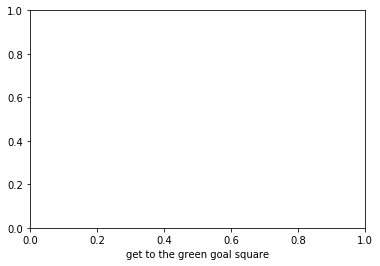

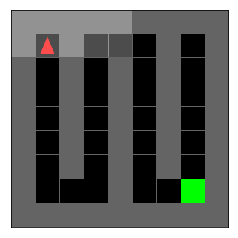

In [12]:
import gym_minigrid
from gym_minigrid.envs import MazeEnv9x9, EmptyEnv5x5
import matplotlib.pyplot as plt
# env = EmptyEnv5x5()
env = MazeEnv9x9()
img = env.render(mode="human")
fig, ax = plt.subplots()
ax.set_xticks([], [])
ax.set_yticks([], [])
imshow_obj = ax.imshow(img)
imshow_obj.set_data(img)
fig.canvas.draw()
plt.savefig("./maze.png")
plt.pause(0.001)
# ax.imshow(, interpolation='bilinear')

# plt.show()
# print(a)

In [35]:
import numpy as np
a = np.array([[1,2]])
x,y = np.where(a==1)
x,y = x[0], y[0]
a = ["1","2","3"]
print(" ".join(a))

1 2 3


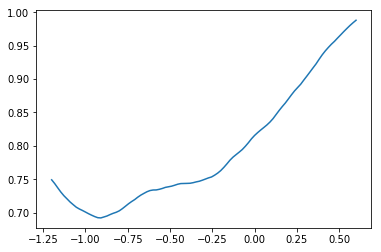

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import random

def _height(xs):
    return np.sin(3 * xs)*.45+.55

min_position = -1.2
max_position = 0.6

K = 0.5 * Matern(length_scale=5)
gp = GaussianProcessRegressor(kernel=K, optimizer=None)


x = np.linspace(min_position, max_position, 100)
safe = [[x[i], _height(x[i])] for i in [0, -1]]
# safe.append([x[random.randint(25,75)], _height(x[0])*random.random()])
# print(safe[-1])
safe = np.array(list(zip(*safe)))

# print(safe)
# print(safe[0].reshape(-1,1), safe[1].reshape(-1))
gp = gp.fit(safe[0].reshape(-1,1), safe[1].reshape(-1))

# y = [_height(_x) for _x in x]
# print(x.reshape(1,-1))
# print(random.randint(1,10))
# np.random.seed(3)
# print(x)
y = gp.sample_y(x.reshape(-1,1), 1, random_state=None)
# print(y)
# print(y)
# print(y)
plt.plot(x, y)

In [299]:
print(random.random())

0.7465604844125513


In [494]:
a = np.array([[1,2], [3,4]])
b = np.where(a==5)
print(a)
print(len(b[0]))
b = np.where(a==np.max(a))
b = [_b[0] for _b in b]
b

[[1 2]
 [3 4]]
0


<generator object <genexpr> at 0x7f65b2001b50>

In [27]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]], dtype=np.float32)
print(x)
x1 = [x.tobytes()]

# print(np.frombuffer(x, dtype=np.float32))
y = np.array([[1,2,3], [4,5,6]], dtype=np.float32)
print(y.tobytes() in x1)

z = np.array([[1,2,3], [4,5,6]], dtype=np.float64)
print(z.dtype, np.float64)
print(z.dtype == np.float64)

[[1. 2. 3.]
 [4. 5. 6.]]
True
float64 <class 'numpy.float64'>
True


In [79]:
a = [1, 2, 3]
b = [1 if i in a else 0 for i in range(len(a))]
b = np.array([1,2,3], dtype=np.float64)
print(b[np.array([1])])

[2.]


In [20]:
import torch
model_checkpoint = torch.load("/home/lemon/Workspace/2020Semester/UGVR/Bayesian_Grid/scripts/model/IL/Basic/MazeGridEnv")
print(model_checkpoint.keys())
print(model_checkpoint['1'])
print("-"*10)

dict_keys(['1', '2'])
OrderedDict([('layer1.0.weight', tensor([[[[-0.3274, -0.5100],
          [ 0.0734,  0.1904]]],


        [[[-0.1889, -0.0735],
          [ 0.4203, -0.0510]]],


        [[[-0.1442,  0.4042],
          [ 0.3941,  0.0568]]],


        [[[ 0.0857,  0.0245],
          [ 0.2936, -0.2718]]],


        [[[-0.4209,  0.4717],
          [ 0.1877, -0.1305]]],


        [[[ 0.3055, -0.3121],
          [-0.4251,  0.4379]]],


        [[[ 0.1061, -0.1907],
          [ 0.4353, -0.4666]]],


        [[[-0.1921,  0.0471],
          [ 0.0673, -0.5092]]]], device='cuda:0')), ('layer1.0.bias', tensor([-0.3557,  0.4925,  0.0840,  0.1011, -0.0724,  0.2540, -0.4821,  0.3204],
       device='cuda:0')), ('layer1.1.weight', tensor([0.9574, 1.0051, 1.0508, 1.0051, 1.0335, 1.0404, 0.9433, 0.9688],
       device='cuda:0')), ('layer1.1.bias', tensor([-0.0357, -0.0970, -0.0546, -0.0317, -0.0418, -0.0489, -0.0347, -0.0328],
       device='cuda:0')), ('layer1.1.running_mean', tensor([-0.4873,  0.

In [21]:
print(model_checkpoint['2'])

OrderedDict([('layer1.0.weight', tensor([[[[-0.3524, -0.5013],
          [ 0.0893,  0.1751]]],


        [[[-0.1911, -0.0926],
          [ 0.4093, -0.0638]]],


        [[[-0.0952,  0.4235],
          [ 0.3889,  0.0599]]],


        [[[ 0.0629,  0.0265],
          [ 0.2905, -0.2847]]],


        [[[-0.4252,  0.4673],
          [ 0.2019, -0.1064]]],


        [[[ 0.2882, -0.2759],
          [-0.4427,  0.4708]]],


        [[[ 0.0963, -0.1801],
          [ 0.4459, -0.4705]]],


        [[[-0.1939,  0.0769],
          [ 0.0838, -0.4653]]]], device='cuda:0')), ('layer1.0.bias', tensor([-0.3589,  0.5065,  0.0831,  0.1194, -0.0630,  0.2512, -0.4944,  0.3128],
       device='cuda:0')), ('layer1.1.weight', tensor([0.9666, 1.0085, 1.0235, 1.0112, 1.0323, 1.0372, 0.9202, 0.9959],
       device='cuda:0')), ('layer1.1.bias', tensor([-0.0300, -0.1640, -0.1067, -0.0875, -0.0519, -0.1032, -0.0751, -0.0194],
       device='cuda:0')), ('layer1.1.running_mean', tensor([-0.4927,  0.5196,  0.2608,  0.1371

In [12]:
a = [1]
print(a.deepcopy())

AttributeError: 'list' object has no attribute 'deepcopy'